In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import boxcox
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

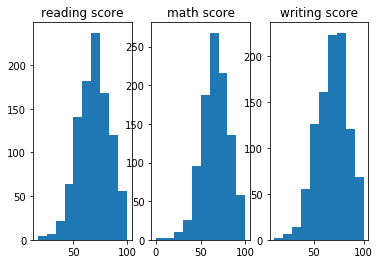

In [3]:
plt.subplot(1, 3, 1)
plt.hist(df['reading score'])
plt.title('reading score')
plt.subplot(1, 3, 2)
plt.hist(df['math score'])
plt.title('math score')
plt.subplot(1, 3, 3)
plt.hist(df['writing score'])
plt.title('writing score')
plt.show()

In [4]:
print(normaltest(df['reading score']))
print(normaltest(df['writing score']))
print(normaltest(df['math score']))

NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)
NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)
NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)


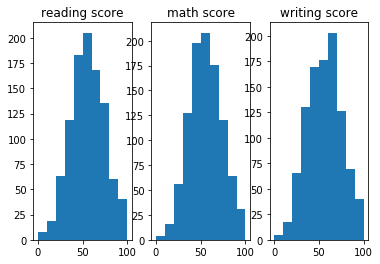

In [51]:
from scipy.special import boxcox1p
from sklearn.preprocessing import minmax_scale


bread = boxcox1p(df['reading score'], 1.5)
bread = minmax_scale(bread, (0, 100))
bmath = boxcox1p(df['math score'], 1.5)
bmath = minmax_scale(bmath, (0, 100))
bwrit = boxcox1p(df['writing score'], 1.5)
bwrit = minmax_scale(bwrit, (0, 100))

plt.subplot(1, 3, 1)
plt.hist(bread)
plt.title('reading score')
plt.subplot(1, 3, 2)
plt.hist(bmath)
plt.title('math score')
plt.subplot(1, 3, 3)
plt.hist(bwrit)
plt.title('writing score')
plt.show()

In [52]:
print('reading: {}'.format(normaltest(bread)))
print('writing: {}'.format(normaltest(bwrit)))
print('math: {}'.format(normaltest(bmath)))

reading: NormaltestResult(statistic=6.953841144902606, pvalue=0.0309024264444426)
writing: NormaltestResult(statistic=7.9017503895278125, pvalue=0.019237857533283952)
math: NormaltestResult(statistic=4.197780518369945, pvalue=0.12259239858143403)


math is normal now

Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores.

In [6]:
df['score'] = (df['math score'] + df['writing score'] + df['reading score']) / 3

Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)
NormaltestResult(statistic=3.68493179268095, pvalue=0.15842628125660851)


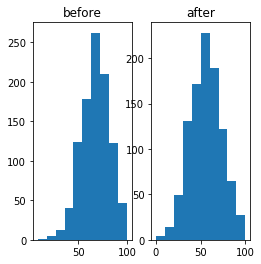

In [53]:
print(normaltest(df.score))
bscore = boxcox1p(df.score, 1.5)
bscore = minmax_scale(bscore, (0, 100))
print(normaltest(bscore))

plt.subplot(1, 3, 1)
plt.hist(df.score)
plt.title('before')

plt.subplot(1, 3, 2)
plt.hist(bscore)
plt.title('after')
plt.show()

Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [57]:
print(df.corr())
print(stats.ttest_ind(df[df['test preparation course'] == 'none']['score'],
                df[df['test preparation course'] == 'completed']['score']))
print(stats.ttest_ind(df[df['lunch'] == 'standard']['score'],
                df[df['lunch'] == 'free/reduced']['score']))
print(stats.ttest_ind(df[df['gender'] == 'female']['score'],
                df[df['gender'] == 'male']['score']))

               math score  reading score  writing score     score
math score       1.000000       0.817580       0.802642  0.918746
reading score    0.817580       1.000000       0.954598  0.970331
writing score    0.802642       0.954598       1.000000  0.965667
score            0.918746       0.970331       0.965667  1.000000
Ttest_indResult(statistic=-8.390944443482592, pvalue=1.633780203592351e-16)
Ttest_indResult(statistic=9.575113051511476, pvalue=7.736791812495384e-21)
Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)


In [63]:
pd.get_dummies(df).corr()

,math score,reading score,writing score,score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
math score,1.000000,0.817580,0.802642,0.918746,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,0.050071,...,0.063228,0.079664,-0.128725,0.060417,0.037056,-0.079852,-0.350877,0.350877,0.177702,-0.177702
reading score,0.817580,1.000000,0.954598,0.970331,0.244313,-0.244313,-0.096274,-0.060283,-0.003074,0.035177,...,0.064386,0.096024,-0.151068,0.106452,0.010782,-0.071369,-0.229560,0.229560,0.241780,-0.241780
writing score,0.802642,0.954598,1.000000,0.965667,0.301225,-0.301225,-0.110714,-0.078254,-0.010203,0.082032,...,0.064799,0.128297,-0.182211,0.125693,0.027989,-0.097326,-0.245769,0.245769,0.312946,-0.312946
score,0.918746,0.970331,0.965667,1.000000,0.130861,-0.130861,-0.104803,-0.078247,-0.030691,0.058902,...,0.067414,0.106599,-0.161936,0.102411,0.026761,-0.087247,-0.290064,0.290064,0.256710,-0.256710
gender_female,-0.167982,0.244313,0.301225,0.130861,1.000000,-1.000000,-0.071001,0.028466,0.063368,-0.030566,...,0.004835,0.011638,-0.037952,0.046188,0.004460,-0.008990,0.021372,-0.021372,-0.006028,0.006028
gender_male,0.167982,-0.244313,-0.301225,-0.130861,-1.000000,1.000000,0.071001,-0.028466,-0.063368,0.030566,...,-0.004835,-0.011638,0.037952,-0.046188,-0.004460,0.008990,-0.021372,0.021372,0.006028,-0.006028
race/ethnicity_group A,-0.091977,-0.096274,-0.110714,-0.104803,-0.071001,0.071001,1.000000,-0.151381,-0.213923,-0.186234,...,-0.048658,0.016307,0.004919,-0.033551,-0.017751,0.073921,0.032329,-0.032329,-0.006315,0.006315
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.078247,0.028466,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,...,-0.007238,-0.019121,0.069093,-0.056363,-0.036203,0.026531,0.008257,-0.008257,-0.000106,0.000106
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.030691,0.063368,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,...,0.037077,0.015682,0.007977,0.001630,-0.015872,-0.045339,0.003385,-0.003385,0.012522,-0.012522
race/ethnicity_group D,0.050071,0.035177,0.082032,0.058902,-0.030566,0.030566,-0.186234,-0.288574,-0.407797,1.000000,...,-0.044674,-0.020556,-0.042118,0.072793,0.042347,0.018402,0.009458,-0.009458,-0.055956,0.055956


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
